## 												Data Analysis on IMDb 



### By Santosh shinde

## Description

For your Final Project, we are providing you with dataset having various columns of different IMDB Movies. You are required to Frame the problem. For this task, you will need to define a problem you want to shed some light on.

We can do this by asking 'What?' This is where you frame the problem i.e. What is the problem?

Once you have framed the problem and gathered initial insights from the data, you can ask the following questions as you dig deeper into your analysis.

* What do you see happening?
* What are the specific symptoms of the problem?
* What is your hypothesis for the cause of the problem?




## **Business Understanding Of A Internet Movie Database:**

The Internet Movie Database (IMDb) is a website database that provides data and facts about films, television programmes, video games, as well as actors, directors, and other members of the film industry.

IMDb comes from a variety of sources, such as filmmakers, film studios, on-screen credits and other official sources. However, much of the information comes from IMDb users themselves, who can submit facts in a wiki-style format.

we will perform EDA(Exploratory Data Analysis)on the provided dataset in order to get actionable insights and convert them into meaningful stories.

## **GitHub Link -**

https://github.com/santy1586/IMDB-Movie-Analysis

## **Problem Statement**


You are required to provide a detailed report for the below data record mentioning the answers of the questions that follows:

***Cleaning the data:*** PThis is one of the most important step to perform before moving forward with the analysis. Use your knowledge learned till now to do this. (Dropping columns, removing null values, etc.)
Your task: Clean the data

***Movies with highest profit:*** Create a new column called profit which contains the difference of the two columns: gross and budget. Sort the column using the profit column as reference. Plot profit (y-axis) vs budget (x- axis) and observe the outliers using the appropriate chart type.
Your task: Find the movies with the highest profit?

***Top 250:*** Create a new column IMDb_Top_250 and store the top 250 movies with the highest IMDb Rating (corresponding to the column: imdb_score). Also make sure that for all of these movies, the num_voted_users is greater than 25,000. Also add a Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.

Extract all the movies in the IMDb_Top_250 column which are not in the English language and store them in a new column named Top_Foreign_Lang_Film. You can use your own imagination also!
Your task: Find IMDB Top 250

***Best Directors:*** TGroup the column using the director_name column.
Find out the top 10 directors for whom the mean of imdb_score is the highest and store them in a new column top10director. In case of a tie in IMDb score between two directors, sort them alphabetically.
Your task: Find the best directors

***Popular Genres:*** Perform this step using the knowledge gained while performing previous steps.
Your task: Find popular genres

***Charts:*** Create three new columns namely, Meryl_Streep, Leo_Caprio, and Brad_Pitt which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the actor_1_name column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.

### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset and having the First look of it.

In [3]:
#Write Code for importing the csv file here
data = pd.read_csv('IMDB_Movies (1).csv')
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


 **A. Cleaning the data**: This is one of the most important step to perform before moving forward with the analysis. Use your knowledge learned till now to do this. (Dropping columns, removing null values, etc.)

**Your task**: Clean the data

In [4]:
#Extracting all the information from dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
#The number of rows and columns
data.shape

(5043, 28)

### Understanding the Variables



In [6]:
#Column names in the dataframe
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

**color :** Contains color of the films that is in black and white and color.

**director_name :** Contains the name of the Directors.

**num_critic_for_reviews :** Contains number of critics reviews.

**duration :** Contains number of dusration of the movies

**director_facebook_likes :** Contains the number of likes got to the director's facebook profile.

**actor_3_facebook_likes :** Contains the number of likes got to 3rd Actor's facebook profile.

**actor_2_name :** Cotains the names of 2nd actors.

**actor_1_facebook_likes :** Contains the number of likes got to 1rd Actor's facebook profile.

**gross :** Contains the Gross profits

**genres :** Contains genres such as action, drama, thriller etc.

**actor_1_name** Contains the names of the 1st Actors.

**movie_title :** Contains the title of the movies.

**num_voted_users :** Contains the number votes given by the users/people.

**cast_total_facebook_likes :** Contains the total number of cast facebook likes.

**actor_3_name :** Contains the names of 3rd Actors.

**facenumber_in_poster :** Contains the number of poster. 

**plot_keywords :** Contains the keywords of the movies.

**num_user_for_reviews :** Contains the total number of reviews of the users/people.

**language :** Contains languages.

**country :** Contains overall Country names of the movies.

**content_rating :** Overall rating of the movies.

**budget :** Contains the overall budget of the movies.

**title_year :** Contains the title of the year. 

**actor_2_facebook_likes :** Contains the number of likes got to 2rd Actor's facebook profile.

**imdb_score:** Contains teh overall IMDB score for the movies.

**aspect_ratio:** aspect ratio.

**movie_facebook_likes :** Contains total number of like for the movies.

**movie_imdb_link :** link of the movies.

In [7]:
# Write your Code for column-wise null count 
data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [8]:
data.drop('movie_imdb_link', axis=1,inplace = True)

In [9]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Here I have Deleted 'movie_imdb_link' column name as it does not provide any intuitions.

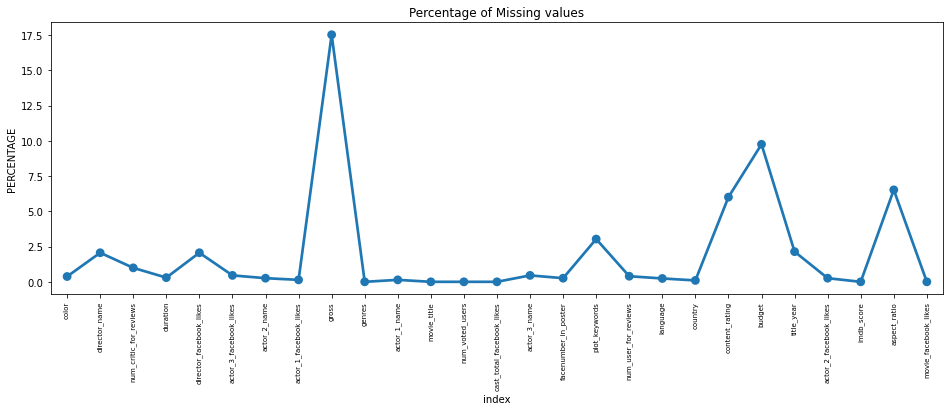

In [10]:
# Visualizing the missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Dropping the missing values

In [11]:
data = data[data['gross'].notna()]
data = data[data['budget'].notna()]
data = data[data['aspect_ratio'].notna()]
data = data[data['actor_3_facebook_likes'].notna()]
data = data[data['actor_3_name'].notna()]
data = data[data['facenumber_in_poster'].notna()]
data = data[data['actor_2_facebook_likes'].notna()]
data = data[data['actor_2_name'].notna()]
data = data[data['color'].notna()]
data = data[data['actor_1_facebook_likes'].notna()]
data = data[data['actor_1_name'].notna()]
data = data[data['num_critic_for_reviews'].notna()]

### Some values has been replaced with the most prominant / occurance values

In [12]:
data['content_rating'].value_counts()

R            1709
PG-13        1312
PG            567
G              87
Not Rated      34
Unrated        23
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [13]:
data['content_rating'].isnull().sum()

29

In [14]:
data['content_rating'].replace(np.nan, 'R', inplace = True)

In [15]:
data['plot_keywords'].isnull().sum()

17

In [16]:
data['plot_keywords'].value_counts()

assistant|experiment|frankenstein|medical student|scientist                        3
animal name in title|ape abducts a woman|gorilla|island|king kong                  3
1940s|child hero|fantasy world|orphan|reference to peter pan                       3
halloween|masked killer|michael myers|slasher|trick or treat                       3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop                3
                                                                                  ..
island|mad scientist|scientist|sequel|spy                                          1
23rd century|bare chested male bondage|enterprise the starship|rescue|sacrifice    1
challenge|china|hong kong|martial arts|martial arts master                         1
circus|circus vargas|elephant|fear|train                                           1
actress name in title|crush|date|four word title|video camera                      1
Name: plot_keywords, Length: 3683, dtype: int64

In [17]:
data['plot_keywords'].replace(np.nan, 'halloween|masked killer|michael myers|slasher|trick or treat', inplace = True)

In [18]:
data['language'].value_counts()

English       3625
French          36
Spanish         23
Mandarin        15
German          13
Japanese        12
Hindi            8
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Hebrew           1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [19]:
data['language'].isnull().sum()

2

In [20]:
#Write your Code for filling the NaN values in the 'language' column here
data['language'].replace(np.nan, 'English', inplace = True)

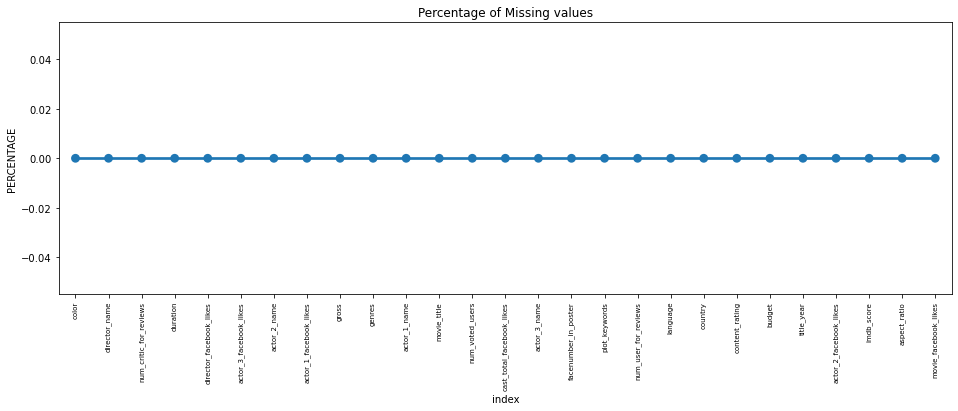

In [21]:
# Visualizing after dropping missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [22]:
data.shape

(3800, 27)

### Finding the duplicated values

In [23]:
df = data.duplicated().value_counts()
df

False    3767
True       33
dtype: int64

Text(0.5, 1.0, 'Number of duplicated value')

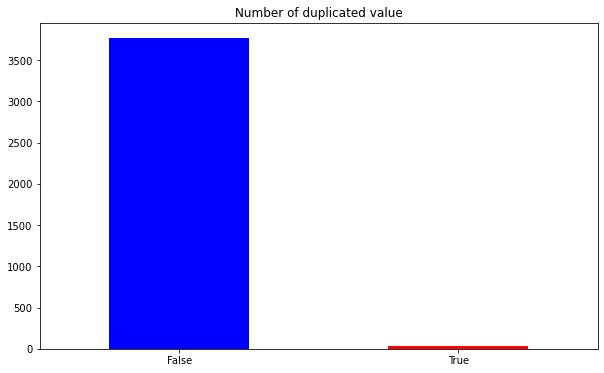

In [24]:
plt.figure(figsize = (10,6))
df.plot(kind = 'bar', color = ['b', 'r'])
plt.xticks(rotation = 360)
plt.title("Number of duplicated value")

### Dropping the duplicated values

In [25]:
data = data.drop_duplicates()
data.shape

(3767, 27)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3767.0,1.655307e+02,1.234595e+02,1.00,75.00,137.00,223.00,8.130000e+02
duration,3767.0,1.102145e+02,2.272304e+01,37.00,96.00,106.00,120.00,3.300000e+02
director_facebook_likes,3767.0,8.012166e+02,3.059668e+03,0.00,10.50,61.00,234.00,2.300000e+04
actor_3_facebook_likes,3767.0,7.576411e+02,1.859263e+03,0.00,186.00,433.00,688.50,2.300000e+04
actor_1_facebook_likes,3767.0,7.666191e+03,1.548748e+04,0.00,732.00,1000.00,12500.00,6.400000e+05
gross,3767.0,5.188295e+07,6.961230e+07,162.00,7589867.00,29077547.00,66467343.50,7.605058e+08
num_voted_users,3767.0,1.044249e+05,1.510450e+05,5.00,18781.50,53053.00,126911.50,1.689764e+06
cast_total_facebook_likes,3767.0,1.138449e+04,1.903807e+04,0.00,1862.00,3967.00,16123.00,6.567300e+05
facenumber_in_poster,3767.0,1.378285e+00,2.056681e+00,0.00,0.00,1.00,2.00,4.300000e+01
budget,3767.0,4.585571e+07,2.256723e+08,218.00,10000000.00,25000000.00,50000000.00,1.221550e+10


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3767 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3767 non-null   object 
 1   director_name              3767 non-null   object 
 2   num_critic_for_reviews     3767 non-null   float64
 3   duration                   3767 non-null   float64
 4   director_facebook_likes    3767 non-null   float64
 5   actor_3_facebook_likes     3767 non-null   float64
 6   actor_2_name               3767 non-null   object 
 7   actor_1_facebook_likes     3767 non-null   float64
 8   gross                      3767 non-null   float64
 9   genres                     3767 non-null   object 
 10  actor_1_name               3767 non-null   object 
 11  movie_title                3767 non-null   object 
 12  num_voted_users            3767 non-null   int64  
 13  cast_total_facebook_likes  3767 non-null   int64

### Changing the Data types 

In [28]:
data['num_user_for_reviews'] = data['num_user_for_reviews'].astype('int')
data['num_critic_for_reviews'] = data['num_critic_for_reviews'].astype('int')
data['duration'] = data['duration'].astype('int')
data['director_facebook_likes'] = data['director_facebook_likes'].astype('int')
data['actor_3_facebook_likes'] = data['actor_3_facebook_likes'].astype('int')
data['actor_1_facebook_likes'] = data['actor_1_facebook_likes'].astype('int')
data['gross'] = data['gross'].astype('int')
data['facenumber_in_poster'] = data['facenumber_in_poster'].astype('int')
data['budget'] = data['budget'].astype('int')
data['title_year'] = data['title_year'].astype('int')
data['actor_2_facebook_likes'] = data['actor_2_facebook_likes'].astype('int')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3767 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3767 non-null   object 
 1   director_name              3767 non-null   object 
 2   num_critic_for_reviews     3767 non-null   int32  
 3   duration                   3767 non-null   int32  
 4   director_facebook_likes    3767 non-null   int32  
 5   actor_3_facebook_likes     3767 non-null   int32  
 6   actor_2_name               3767 non-null   object 
 7   actor_1_facebook_likes     3767 non-null   int32  
 8   gross                      3767 non-null   int32  
 9   genres                     3767 non-null   object 
 10  actor_1_name               3767 non-null   object 
 11  movie_title                3767 non-null   object 
 12  num_voted_users            3767 non-null   int64  
 13  cast_total_facebook_likes  3767 non-null   int64

***11 variables are in Object format i.e there are categorical values.***

***14 variable is of Integer data types***

***2 variables is of Float data types***

***Before cleaning data,there were 5043 Rows and 28 Columns and after cleaning data there are 3767 Rows and 27 columns.***

***Further removed IMDB_movie_link column as it was not serving any intuitions.***

***Removed Duplicate values from the dataset, And also changed data types of the columns which was incorrect.***

### The Data is clean and is ready for further Visualization.

In [30]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64,90,397,0,Nargess Mamizadeh,5,673780,Drama,...,26,Persian,Iran,Not Rated,10000,2000,0,7.5,1.85,697
5029,Color,Kiyoshi Kurosawa,78,111,62,6,Anna Nakagawa,89,94596,Crime|Horror|Mystery|Thriller,...,50,Japanese,Japan,R,1000000,1997,13,7.4,1.85,817
5033,Color,Shane Carruth,143,77,291,8,David Sullivan,291,424760,Drama|Sci-Fi|Thriller,...,371,English,USA,PG-13,7000,2004,45,7.0,1.85,19000
5035,Color,Robert Rodriguez,56,81,0,6,Peter Marquardt,121,2040920,Action|Crime|Drama|Romance|Thriller,...,130,Spanish,USA,R,7000,1992,20,6.9,1.37,0


**B. Movies with highest profit:** 
Create a new column called profit which contains the difference of the two columns: gross and budget. Sort the column using the profit column as reference. Plot profit (y-axis) vs budget (x- axis) and observe the outliers using the appropriate chart type.

**Your task**: Find the movies with the highest profit?

### Creating a new column called Profits

In [31]:
data['profit']=data['gross']-data['budget']
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,523505847
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,9404152
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,-44925825
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,198130642
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000,-190641321


In [32]:
Highest_profit = data.sort_values(['profit'], axis = 0, ascending = False)
Highest_profit.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,523505847
29,Color,Colin Trevorrow,644,124,365,1000,Judy Greer,3000,652177271,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,150000000,2015,2000,7.0,2.00,150000,502177271
26,Color,James Cameron,315,194,0,794,Kate Winslet,29000,658672302,Drama|Romance,...,English,USA,PG-13,200000000,1997,14000,7.7,2.35,26000,458672302
3024,Color,George Lucas,282,125,0,504,Peter Cushing,11000,460935665,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,11000000,1977,1000,8.7,2.35,33000,449935665
3080,Color,Steven Spielberg,215,120,14000,548,Dee Wallace,861,434949459,Family|Sci-Fi,...,English,USA,PG,10500000,1982,725,7.9,1.85,34000,424449459


So after sorting the profit values, We only need title of the movie,country, budget and profits

In [33]:
#Retriving top 10 Highest proift movies
top_10 = Highest_profit.iloc[:10]
top_10[['movie_title','country','budget','profit']]

,movie_title,country,budget,profit
0,Avatar,USA,237000000,523505847
29,Jurassic World,USA,150000000,502177271
26,Titanic,USA,200000000,458672302
3024,Star Wars: Episode IV - A New Hope,USA,11000000,449935665
3080,E.T. the Extra-Terrestrial,USA,10500000,424449459
17,The Avengers,USA,220000000,403279547
509,The Lion King,USA,45000000,377783777
240,Star Wars: Episode I - The Phantom Menace,USA,115000000,359544677
66,The Dark Knight,USA,185000000,348316061
439,The Hunger Games,USA,78000000,329999255


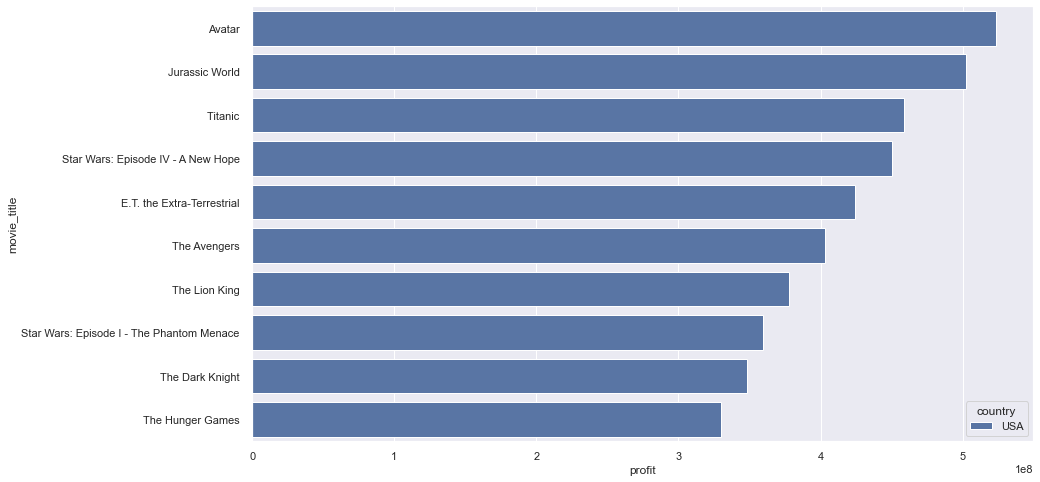

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,8))
sns.barplot(data = top_10, y = top_10['movie_title'], x = top_10['profit'],hue = top_10['country'])
plt.show()



### Finding Outliers 

In [35]:
data[['budget','profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3767.0,3.791691e+07,9.484638e+07,-2.147484e+09,10000000.0,25000000.0,50000000.0,2.127520e+09
profit,3767.0,9.405409e+06,1.001004e+08,-2.147288e+09,-10457232.5,1204508.0,25293833.5,5.235058e+08


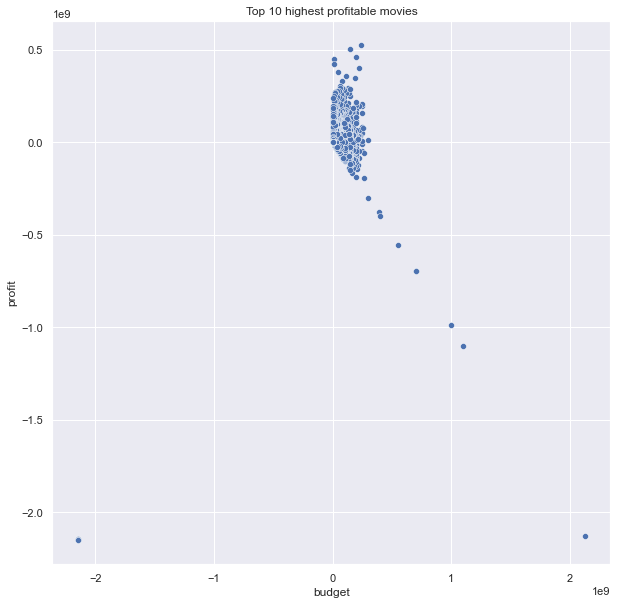

In [36]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['budget'],data['profit'])
plt.title("Top 10 highest profitable movies")
plt.show()

### Observation

***Avator is the highest profitable movie of all time and followed by jurassic world and so on***

***There are as many as 5-6 Outliers in the profit column***

**C1. Top 250**: 
    Create a new column IMDb_Top_250 and store the top 250 movies with the highest IMDb Rating (corresponding to the column: imdb_score). Also make sure that for all of these movies, the num_voted_users is greater than 25,000. Also add a Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.

Extract all the movies in the IMDb_Top_250 column which are not in the English language and store them in a new column named Top_Foreign_Lang_Film. You can use your own imagination also!

**Your task**: Find IMDB Top 250

In [37]:
#Creating the column IMDb_Top_250 in the dataset
data['IMDb_Top_250'] = data['movie_title'].values
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,IMDb_Top_250
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000,2009,936,7.9,1.78,33000,523505847,Avatar
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,USA,PG-13,300000000,2007,5000,7.1,2.35,0,9404152,Pirates of the Caribbean: At World's End
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,UK,PG-13,245000000,2015,393,6.8,2.35,85000,-44925825,Spectre
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,198130642,The Dark Knight Rises
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000,2012,632,6.6,2.35,24000,-190641321,John Carter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64,90,397,0,Nargess Mamizadeh,5,673780,Drama,...,Iran,Not Rated,10000,2000,0,7.5,1.85,697,663780,The Circle
5029,Color,Kiyoshi Kurosawa,78,111,62,6,Anna Nakagawa,89,94596,Crime|Horror|Mystery|Thriller,...,Japan,R,1000000,1997,13,7.4,1.85,817,-905404,The Cure
5033,Color,Shane Carruth,143,77,291,8,David Sullivan,291,424760,Drama|Sci-Fi|Thriller,...,USA,PG-13,7000,2004,45,7.0,1.85,19000,417760,Primer
5035,Color,Robert Rodriguez,56,81,0,6,Peter Marquardt,121,2040920,Action|Crime|Drama|Romance|Thriller,...,USA,R,7000,1992,20,6.9,1.37,0,2033920,El Mariachi


In [38]:
# Write your code to extract 'top 250' films from data here
Top_250=data[['IMDb_Top_250','language','num_voted_users','imdb_score',]]

sort= Top_250.sort_values(by=['imdb_score'],ascending=False)
Top_250=sort[Top_250.num_voted_users>25000]
Top_250.head(250)

,IMDb_Top_250,language,num_voted_users,imdb_score
1937,The Shawshank Redemption,English,1689764,9.3
3466,The Godfather,English,1155770,9.2
2837,The Godfather: Part II,English,790926,9.0
66,The Dark Knight,English,1676169,9.0
4498,"The Good, the Bad and the Ugly",Italian,503509,8.9
...,...,...,...,...
1606,The Notebook,English,396396,7.9
4082,Before Midnight,English,95362,7.9
1171,Hero,Mandarin,149414,7.9
2666,The Remains of the Day,English,45703,7.9


In [39]:
#Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.
Top_250["Rank"]=Top_250['IMDb_Top_250'].rank()
Top_250['Rank']=Top_250['Rank'].sort_values(ascending=True).values
Top_250.head(250)

,IMDb_Top_250,language,num_voted_users,imdb_score,Rank
1937,The Shawshank Redemption,English,1689764,9.3,1.0
3466,The Godfather,English,1155770,9.2,2.0
2837,The Godfather: Part II,English,790926,9.0,3.0
66,The Dark Knight,English,1676169,9.0,4.0
4498,"The Good, the Bad and the Ugly",Italian,503509,8.9,5.0
...,...,...,...,...,...
1606,The Notebook,English,396396,7.9,246.0
4082,Before Midnight,English,95362,7.9,247.0
1171,Hero,Mandarin,149414,7.9,248.0
2666,The Remains of the Day,English,45703,7.9,249.0


In [40]:
#Setting the Rank column as the index
Top_250=Top_250.set_index('Rank')
Top_250.head(250)

,IMDb_Top_250,language,num_voted_users,imdb_score
Rank,,,,
1.0,The Shawshank Redemption,English,1689764,9.3
2.0,The Godfather,English,1155770,9.2
3.0,The Godfather: Part II,English,790926,9.0
4.0,The Dark Knight,English,1676169,9.0
5.0,"The Good, the Bad and the Ugly",Italian,503509,8.9
...,...,...,...,...
246.0,The Notebook,English,396396,7.9
247.0,Before Midnight,English,95362,7.9
248.0,Hero,Mandarin,149414,7.9


**C2. Top 250**:
Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [41]:
# Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film=data[['IMDb_Top_250','language','num_voted_users','imdb_score',]]

sort= Top_Foreign_Lang_Film.sort_values(by=['imdb_score'],ascending=False)
Top_Foreign_Lang_Film= Top_250[Top_250['language'] != 'English']
Top_Foreign_Lang_Film.head(250)

,IMDb_Top_250,language,num_voted_users,imdb_score
Rank,,,,
5.0,"The Good, the Bad and the Ugly",Italian,503509,8.9
14.0,Seven Samurai,Japanese,229012,8.7
19.0,City of God,Portuguese,533200,8.7
23.0,Spirited Away,Japanese,417971,8.6
39.0,Children of Heaven,Persian,27882,8.5
...,...,...,...,...
1538.0,Night Watch,Russian,47097,6.5
1669.0,The Interpreter,Aboriginal,86152,6.4
1702.0,Dead Snow,Norwegian,54601,6.4


In [42]:
Top_Foreign_Lang_Film["Rank"]=Top_Foreign_Lang_Film['IMDb_Top_250'].rank()
Top_Foreign_Lang_Film['Rank']=Top_Foreign_Lang_Film['Rank'].sort_values(ascending=True).values
Top_Foreign_Lang_Film.head(250)

,IMDb_Top_250,language,num_voted_users,imdb_score,Rank
Rank,,,,,
5.0,"The Good, the Bad and the Ugly",Italian,503509,8.9,1.0
14.0,Seven Samurai,Japanese,229012,8.7,2.0
19.0,City of God,Portuguese,533200,8.7,3.0
23.0,Spirited Away,Japanese,417971,8.6,4.0
39.0,Children of Heaven,Persian,27882,8.5,5.0
...,...,...,...,...,...
1538.0,Night Watch,Russian,47097,6.5,87.0
1669.0,The Interpreter,Aboriginal,86152,6.4,88.0
1702.0,Dead Snow,Norwegian,54601,6.4,89.0


In [43]:
#Setting the Rank column as the index
Top_Foreign_Lang_Film=Top_Foreign_Lang_Film.set_index('Rank')
Top_Foreign_Lang_Film.head(250)

,IMDb_Top_250,language,num_voted_users,imdb_score
Rank,,,,
1.0,"The Good, the Bad and the Ugly",Italian,503509,8.9
2.0,Seven Samurai,Japanese,229012,8.7
3.0,City of God,Portuguese,533200,8.7
4.0,Spirited Away,Japanese,417971,8.6
5.0,Children of Heaven,Persian,27882,8.5
...,...,...,...,...
87.0,Night Watch,Russian,47097,6.5
88.0,The Interpreter,Aboriginal,86152,6.4
89.0,Dead Snow,Norwegian,54601,6.4


In [44]:
Top_Foreign_Lang_Film.shape

(91, 4)

<AxesSubplot:xlabel='imdb_score', ylabel='IMDb_Top_250'>

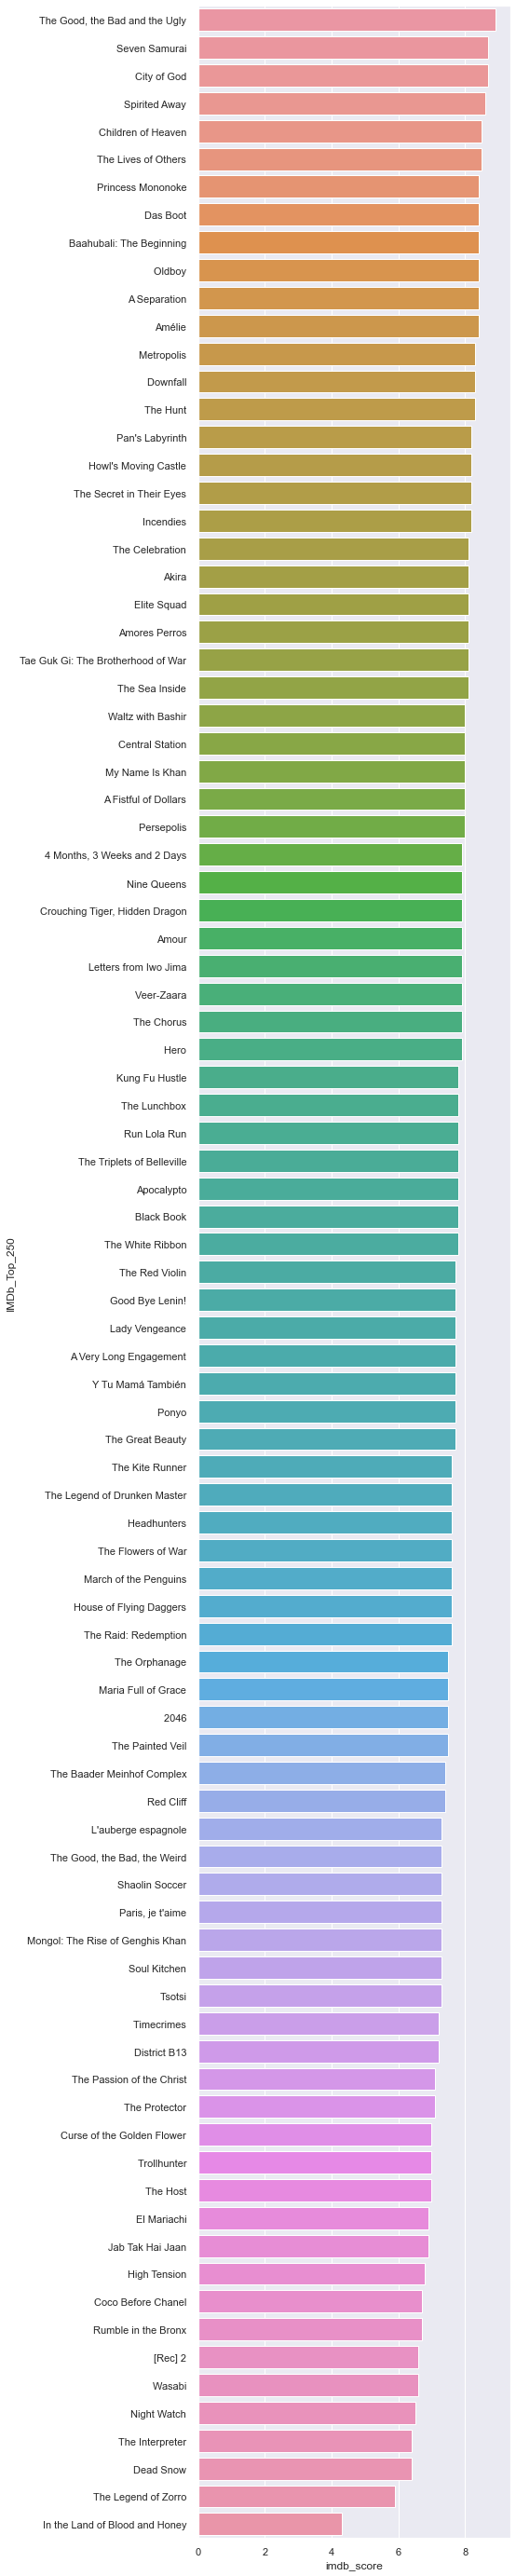

In [45]:
plt.figure(figsize = (6,50))
sns.barplot(data = Top_Foreign_Lang_Film, y = Top_Foreign_Lang_Film['IMDb_Top_250'], x = Top_Foreign_Lang_Film['imdb_score'])

### Observation

***Overall in top250 Movies 'The Shawshank Redemption' has the highest IMDB score and the lowest of the lowest movie is 'Avator'***

***Overall in top250 Movies which are not in English Language 'The Good, the Bad and the Ugly' has the highest IMDB score and the lowest of the lowest movie is 'In the Land of Blood and Honey'***

**D. Best Directors**: TGroup the column using the director_name column.

Find out the top 10 directors for whom the mean of imdb_score is the highest and store them in a new column top10director. In case of a tie in IMDb score between two directors, sort them alphabetically.

**Your task**: Find the best directors 

In [46]:
data['top10director'] = data['director_name'].values
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,IMDb_Top_250,top10director
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000,2009,936,7.9,1.78,33000,523505847,Avatar,James Cameron
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,PG-13,300000000,2007,5000,7.1,2.35,0,9404152,Pirates of the Caribbean: At World's End,Gore Verbinski
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,PG-13,245000000,2015,393,6.8,2.35,85000,-44925825,Spectre,Sam Mendes
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,PG-13,250000000,2012,23000,8.5,2.35,164000,198130642,The Dark Knight Rises,Christopher Nolan
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,PG-13,263700000,2012,632,6.6,2.35,24000,-190641321,John Carter,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64,90,397,0,Nargess Mamizadeh,5,673780,Drama,...,Not Rated,10000,2000,0,7.5,1.85,697,663780,The Circle,Jafar Panahi
5029,Color,Kiyoshi Kurosawa,78,111,62,6,Anna Nakagawa,89,94596,Crime|Horror|Mystery|Thriller,...,R,1000000,1997,13,7.4,1.85,817,-905404,The Cure,Kiyoshi Kurosawa
5033,Color,Shane Carruth,143,77,291,8,David Sullivan,291,424760,Drama|Sci-Fi|Thriller,...,PG-13,7000,2004,45,7.0,1.85,19000,417760,Primer,Shane Carruth
5035,Color,Robert Rodriguez,56,81,0,6,Peter Marquardt,121,2040920,Action|Crime|Drama|Romance|Thriller,...,R,7000,1992,20,6.9,1.37,0,2033920,El Mariachi,Robert Rodriguez


In [48]:
# Write your code for extracting the top 10 directors here
top=data.groupby('top10director')

top10director=pd.DataFrame(top['imdb_score'].mean().sort_values(ascending=False))  
top10director=top10director.head(10)

top10director=top10director.sort_values(['imdb_score','top10director'],ascending=(False,True))
top10director

,imdb_score
top10director,
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Damien Chazelle,8.500000
Majid Majidi,8.500000
Ron Fricke,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
Asghar Farhadi,8.400000


***So according to the above findings 'Charles Chaplin' has the highest IMDB score of 8.6 and S.S Rajamouli is lowest in the top 10 directors who has 8.4 IMDB score.***



**E. Popular Genres**: Perform this step using the knowledge gained while performing previous steps.

**Your task**: Find popular genres

In [49]:
popular=data.groupby('genres')

pop=pd.DataFrame(popular['imdb_score'].mean().sort_values(ascending=False)) 
pop=pop.head(10)

pop=pop.sort_values(['imdb_score','genres'],ascending=(False,True))
pop

,imdb_score
genres,
Adventure|Animation|Drama|Family|Musical,8.50
Crime|Drama|Fantasy|Mystery,8.50
Action|Adventure|Drama|Fantasy|War,8.40
Adventure|Animation|Fantasy,8.40
Adventure|Drama|Thriller|War,8.40
Adventure|Animation|Comedy|Drama|Family|Fantasy,8.30
Biography|Drama|History|Music,8.30
Documentary|Drama|Sport,8.30
Documentary|War,8.30


***As from the above findings 'Adventure|Animation|Drama|Family|Musical' genre has the highest ratings***

**F. Charts**: 
  1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.


**Your task**: Find the critic-favorite and audience-favorite actors

In [50]:
# Write your code for creating three new dataframes here
Meryl_Streep=data[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]
Leo_Caprio=data[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]
Brad_Pitt=data[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]

# Include all movies in which Meryl_Streep is the lead
Meryl_Streep=Meryl_Streep.loc[Meryl_Streep['actor_1_name']=='Meryl Streep']
Meryl_Streep

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
410,Meryl Streep,It's Complicated,187,214
1106,Meryl Streep,The River Wild,42,69
1204,Meryl Streep,Julie & Julia,252,277
1408,Meryl Streep,The Devil Wears Prada,208,631
1483,Meryl Streep,Lions for Lambs,227,298
1575,Meryl Streep,Out of Africa,66,200
1618,Meryl Streep,Hope Springs,234,178
1674,Meryl Streep,One True Thing,64,112
1925,Meryl Streep,The Hours,174,660
2781,Meryl Streep,The Iron Lady,331,350


In [51]:
# Include all movies in which Leo_Caprio is the lead
Leo_Caprio=Leo_Caprio.loc[Leo_Caprio['actor_1_name']=='Leonardo DiCaprio']
Leo_Caprio

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
26,Leonardo DiCaprio,Titanic,315,2528
50,Leonardo DiCaprio,The Great Gatsby,490,753
97,Leonardo DiCaprio,Inception,642,2803
179,Leonardo DiCaprio,The Revenant,556,1188
257,Leonardo DiCaprio,The Aviator,267,799
296,Leonardo DiCaprio,Django Unchained,765,1193
307,Leonardo DiCaprio,Blood Diamond,166,657
308,Leonardo DiCaprio,The Wolf of Wall Street,606,1138
326,Leonardo DiCaprio,Gangs of New York,233,1166
361,Leonardo DiCaprio,The Departed,352,2054


In [52]:
# Include all movies in which Brad pitt is the lead
Brad_Pitt=Brad_Pitt.loc[Brad_Pitt['actor_1_name']=='Brad Pitt']
Brad_Pitt

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
101,Brad Pitt,The Curious Case of Benjamin Button,362,822
147,Brad Pitt,Troy,220,1694
254,Brad Pitt,Ocean's Twelve,198,627
255,Brad Pitt,Mr. & Mrs. Smith,233,798
382,Brad Pitt,Spy Game,142,361
400,Brad Pitt,Ocean's Eleven,186,845
470,Brad Pitt,Fury,406,701
611,Brad Pitt,Seven Years in Tibet,76,119
683,Brad Pitt,Fight Club,315,2968
792,Brad Pitt,Sinbad: Legend of the Seven Seas,98,91


In [53]:
#Combinig all the movies of these leading actors
Combined=Meryl_Streep.append(Leo_Caprio).append(Brad_Pitt)

Combined

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
410,Meryl Streep,It's Complicated,187,214
1106,Meryl Streep,The River Wild,42,69
1204,Meryl Streep,Julie & Julia,252,277
1408,Meryl Streep,The Devil Wears Prada,208,631
1483,Meryl Streep,Lions for Lambs,227,298
1575,Meryl Streep,Out of Africa,66,200
1618,Meryl Streep,Hope Springs,234,178
1674,Meryl Streep,One True Thing,64,112
1925,Meryl Streep,The Hours,174,660
2781,Meryl Streep,The Iron Lady,331,350


In [54]:
# Write your code for grouping the combined dataframe here
Actor_name=Combined.groupby('actor_1_name')
Actor_name

In [55]:
# Grouping actor_1_name with num_critic_for_reviews
Combined.groupby(['actor_1_name'])['num_critic_for_reviews'].mean().reset_index()

,actor_1_name,num_critic_for_reviews
0,Brad Pitt,245.000000
1,Leonardo DiCaprio,330.190476
2,Meryl Streep,181.454545


In [56]:
# Grouping actor_1_name with num_user_for_reviews
Combined.groupby(['actor_1_name'])['num_user_for_reviews'].mean().reset_index()

,actor_1_name,num_user_for_reviews
0,Brad Pitt,742.352941
1,Leonardo DiCaprio,914.476190
2,Meryl Streep,297.181818


In [57]:
# Grouping all the three variables and finding their mean
Combined.groupby(['actor_1_name'])['num_critic_for_reviews','num_user_for_reviews'].mean()

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,181.454545,297.181818


(array([0, 1, 2]),
 [Text(0, 0, 'Brad Pitt'),
  Text(1, 0, 'Leonardo DiCaprio'),
  Text(2, 0, 'Meryl Streep')])

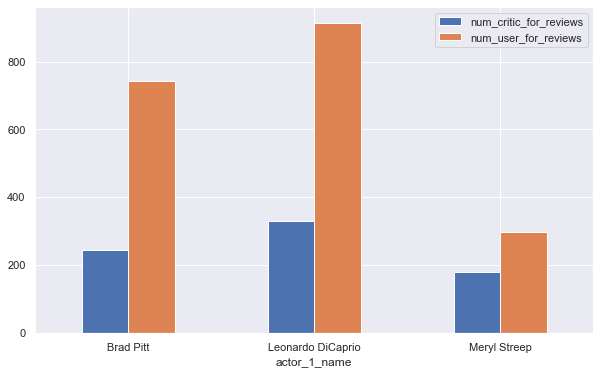

In [58]:
# Ploting Graph for better visualization.
Combined.groupby(['actor_1_name'])['num_critic_for_reviews','num_user_for_reviews'].mean().plot(kind = 'bar',figsize = (10,6))
plt.xticks(rotation = 360)

***Leonardo DiCaprio has totally aced against the other two Actors.***

In [59]:
# Write the code for calculating decade here
data['decade']=data['title_year'].apply(lambda x: (x//10) *10).astype(np.int64)
data['decade']=data['decade'].astype(str)+'s'
data=data.sort_values(['decade'])
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,IMDb_Top_250,top10director,decade
2734,Black and White,Fritz Lang,260,145,756,18,Gustav Fröhlich,136,26435,Drama|Sci-Fi,...,6000000,1927,23,8.3,1.33,12000,-5973565,Metropolis,Fritz Lang,1920s
4812,Black and White,Harry Beaumont,36,100,4,4,Bessie Love,77,2808000,Musical|Romance,...,379000,1929,28,6.3,1.37,167,2429000,The Broadway Melody,Harry Beaumont,1920s
4958,Black and White,Harry F. Millarde,1,110,0,0,Johnnie Walker,2,3000000,Crime|Drama,...,100000,1920,2,4.8,1.33,0,2900000,Over the Hill to the Poorhouse,Harry F. Millarde,1920s
4157,Black and White,Victor Fleming,213,102,149,357,Terry,695,22202612,Adventure|Family|Fantasy|Musical,...,2800000,1939,421,8.1,1.37,14000,19402612,The Wizard of Oz,Victor Fleming,1930s
3970,Color,Victor Fleming,157,226,149,248,George Reeves,503,198655278,Drama|History|Romance|War,...,3977000,1939,384,8.2,1.37,16000,194678278,Gone with the Wind,Victor Fleming,1930s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Color,Gary Winick,159,105,56,22,Marcia DeBonis,898,53021560,Comedy|Drama|Romance,...,30000000,2010,60,6.5,2.35,13000,23021560,Letters to Juliet,Gary Winick,2010s
2456,Color,Jeff Nichols,263,112,337,201,Sam Shepard,4000,3707794,Adventure|Drama|Sci-Fi|Thriller,...,18000000,2016,820,6.7,2.35,0,-14292206,Midnight Special,Jeff Nichols,2010s
3409,Color,John Carney,283,104,109,7,Karen Pittman,480,16168741,Drama|Music,...,8000000,2013,12,7.4,1.85,43000,8168741,Begin Again,John Carney,2010s
3422,Color,Claudia Llosa,56,97,43,47,Zen McGrath,144,52961,Drama,...,8000000,2014,63,5.3,2.35,675,-7947039,Aloft,Claudia Llosa,2010s


In [60]:
# Write your code for creating the data frame df_by_decade
df_by_decade=data.groupby('decade')
df_by_decade['num_voted_users'].sum()
df_by_decade=pd.DataFrame(df_by_decade['num_voted_users'].sum())
df_by_decade

,num_voted_users
decade,
1920s,116392
1930s,804839
1940s,159517
1950s,678336
1960s,2982551
1970s,8523299
1980s,19987476
1990s,69720305
2000s,170859021


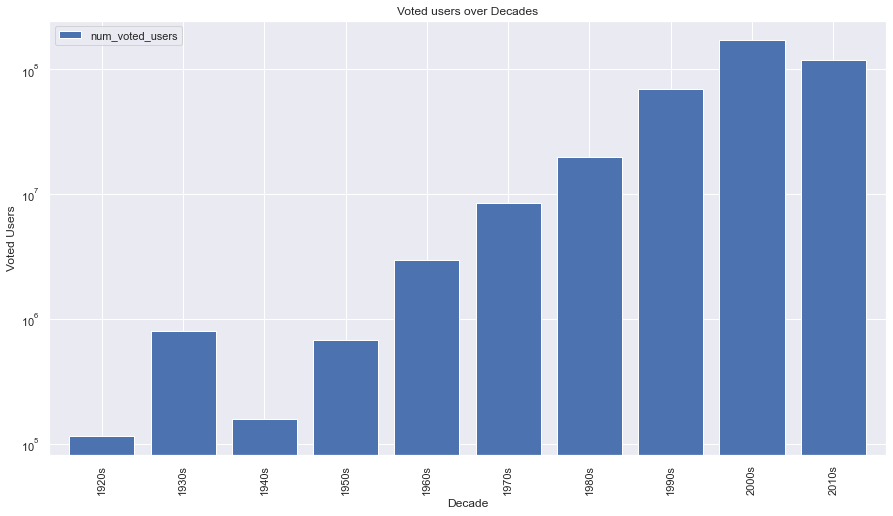

In [61]:
# Write your code for plotting number of voted users vs decade
df_by_decade.plot.bar(figsize=(15,8),width=0.8)
plt.xlabel("Decade")
plt.ylabel("Voted Users")
plt.title("Voted users over Decades")
plt.yscale('log') 
plt.show()

### Observation
In 2000s people voted the most followed by 2010s